# 决策树

## 1.决策树模型概述
* 决策树学习是由训练数据集估计条件概率模型，选择的条件概率模型应该不仅对训练数据集有效，而且对未知数据有很好的预测;
* 决策树学习用损失函数表示这一目标，即最小化损失函数;损失函数通常是正则化的极大似然函数
* 决策树学习的算法通常是一个递归地选择最优特征，并根据最优特征对训练数据进行分割，使得对各个子数据集有一个最好的分类过程;
* 决策树算法包括:$\quad$1.特征选择$\quad$2.决策树生成$\quad$3.决策树剪枝过程

## 2.特征选择

### 1.信息增益

为了便于说明，先给出熵与条件熵的定义.
#### 1.熵
${\bf 熵（entropy）是表示随机变量不确定性的度量}$.设X是一个取有限个值的离散随机变量，其概率分布为$P(X=x_i)=p_i,i=1,2,...,n$.则随机变量X的熵定义为:

$H(X)=-\Sigma^n_{i=1}p_ilog p_i$,

其中对数log以2或e为底,这时熵的单位分别称作比特(bit)或纳特(nat).由定义可知,熵只依赖于X的分布，而与X的取值无关,所以也可将X的熵记为:$H(p)=-\Sigma^n_{i=1}p_ilog p_i$.

${\bf 熵越大,随机变量的不确定性就越大}$

#### 2.条件熵
${\bf 条件熵H(Y\mid X)表示在已知随机变量X的条件下随机变量Y的不确定性}$.定义为X给定条件下Y的条件概率分布的熵对X的数学期望:

$H(Y\mid X)=\Sigma^n_{i=1}p_iH(Y\mid X=x_i),p_i=P(X=x_i),i=1,2,...,n$

#### 3.信息增益
${\bf 信息增益(information gain)}$表示得知特征X的信息而使得类Y的信息的不确定性减少的程度.

特征A对训练数据集D的信息增益$g(D,A)$定义为集合$D$的经验熵$H(D)$与特征A给定条件下$D$的经验条件熵$H(D\mid A)$之差，即

$g(D\mid A)=H(D)-H(D\mid A)$

一般地,熵$H(Y)$与条件熵$H(Y\mid X)$之差称为互信息.决策树学习中的信息增益等价于训练数据集中类与特征的互信息.

根据信息增益准则的特征选择方法是:训练数据集D,计算其每个特征的信息增益，并比较它们的大小，选择信息增益最大的特征.

设训练数据集为D,$|D|$表示其样本容量,即样本个数.设有K个类$C_k,k=1,2,...,K$,$|C_k|$为属于类$C_k$的个数,$\Sigma^K_{k=1}|C_k|=|D|$.设特征A有n个不同的取值${a_1,a_2,...,a_n}$,根据特征A的取值将D划分为n个子集${D_1,D_2,...,D_n}$,$|D_i|$为$D_i$的样本个数,$\Sigma^n_{i=1}|D_i|=|D|$.记子集$D_i$中属于类$C_k$的样本的集合为$D_{ik}$,即$D_{ik}=D_i\cap C_k$,$|D_{ik}|$为$D_{ik}$的样本个数.于是,信息增益算法如下:

### 信息增益算法

输入:训练数据集D和特征A;

输出:特征A对训练数据集D的信息增益$g(D,A)$

(1)计算数据集D的经验熵H(D)

$\quad H(D)=-\Sigma^K_{k=1}\frac{|C_k|}{|D|}log_2\frac{|C_k|}{|D|}$

(2)计算特征A对数据集D的经验条件熵H(D|A)

$\quad H(D|A)=\Sigma^n_{i=1}\frac{|D_i|}{|D|}H(D_i)=-\Sigma^n_{i=1}\frac{|D_i|}{|D|}\Sigma^K_{k=1}\frac{|D_{ik}|}{|D_i|}log_2\frac{|D_{ik}|}{D_i}$

(3)计算信息增益

$\quad g(D,A)=H(D)-H(D|A)$

#### 例1
对表中给出的训练数据集D,根据信息增益准则选择最优特征.

|ID|年龄|有工作|有自己的房子|信贷情况|类别|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|青年 |否|否|一般|否|
|2|青年 |否|否|好  |否|
|3|青年 |是|否|好  |是|
|4|青年 |是|是|一般|是|
|5|青年 |否|否|一般|否|
|6|中年 |否|否|一般|否|
|7|中年 |否|否|好  |否|
|8|中年 |是|是|好  |是|
|9|中年 |否|是|非常好|是|
|10|中年|否|是|非常好|是|
|11|老年|否|是|非常好|是|
|12|老年|否|是|好|是|
|13|老年|是|否|好|是|
|14|老年|是|否|非常好|是|
|15|老年|否|否|一般|否|

${\bf 解}\quad$首先计算经验熵H(D).

$H(D) = -\frac{9}{15}log_2\frac{9}{15}-\frac{6}{15}log_2\frac{6}{15}=0.971$

然后计算各特征对数据集D的信息增益，以$A_1,A_2,A_3,A_4$表示年龄、有工作、有自己的房子、信贷情况四个特征.

(1)$g(D,A_1) = H(D)-[\frac{5}{15}H(D_1)+\frac{5}{15}H(D_2)+\frac{5}{15}H(D_3)]=H(D)-\frac{5}{15}[(-\frac{2}{5}log_2\frac{2}{5}-\frac{3}{5}log_2\frac{3}{5})+(-\frac{3}{5}log_2\frac{3}{5}-\frac{2}{5}log_2\frac{2}{5})+(-\frac{4}{5}log_2\frac{4}{5}-\frac{1}{5}log_2\frac{1}{5})]=0.971-0.888=0.083$

(2)$g(D,A_2) = H(D)-[\frac{5}{15}H(D_1)+\frac{10}{15}H(D_2)] = H(D)-[\frac{5}{15}(-\frac{5}{5}log_2\frac{5}{5}-0)+\frac{10}{15}(-\frac{4}{10}log_2\frac{4}{10}-\frac{6}{10}log_2\frac{6}{10})]=0.971-0.647=0.324$

(3)$g(D,A_3) = H(D)-[\frac{6}{15}H(D_1)+\frac{9}{15}H(D_2)]=H(D)-[\frac{6}{15}\times 0+\frac{9}{15}(-\frac{3}{9}log_2\frac{3}{9}-\frac{6}{9}log_2\frac{6}{9})] = 0.971-0.550=0.420$

(4)$g(D,A_4) = H(D)-[\frac{4}{15}H(D_1)+\frac{6}{15}H(D_2)+\frac{5}{15}H(D_3)]=H(D)-[\frac{4}{15}\times 0+\frac{6}{15}(-\frac{4}{6}log_2\frac{4}{6}-\frac{2}{6}log_2\frac{2}{6})+\frac{5}{15}(-\frac{1}{5}log_2\frac{1}{5}-\frac{4}{5}log_2\frac{4}{5})]=0.971-0.608=0.363$

最终，比较各特征的信息增益，选择具有最大信息增益的特征$A_3$(有自己的房子)作为最优特征

## 3.决策树生成
### 1.ID3算法
ID3算法的核心是在决策树各个结点上应用信息增益准则选择特征，递归地构建决策树。具体方法是：
* 从根结点开始，对结点计算所有可能的特征的信息增益，选择信息增益最大的特征作为结点的特征，由该特征的不同取值建立子结点；
* 再对子结点递归调用以上方法，构建决策树；
* 直到所有特征的信息增益均很小或没有特征可以选择为止，最后得到一个决策树。

$\quad$下面我们通过例子来理解ID3算法

${\bf 例2}$

对上表中的训练数据集，利用ID3算法构建决策树。

${\bf 解}\quad$由例1的结果可知，特征$A_3$的信息增益最大，所以选择$A_3$作为根结点的特征.它将数据集D划分为两个子集$D_1(A_3取值为“是”),D_2(A_3取值为“否”)$。

由于$D_1$中只有同一类的样本点，所以它成为一个叶结点，类标记为“是”；对于$D_2$中的样本点，继续利用信息增益准则来选择最优特征，过程如下：

计算$D_2$的经验熵:

$H(D_2)=-\frac{3}{9}log_2\frac{3}{8}-\frac{6}{9}log_2\frac{6}{9}=0.918$

计算条件熵:

$g(D_2,A_1) = H(D_2)-[\frac{4}{9}H(D_{A11})+\frac{2}{9}H(D_{A12})+\frac{3}{9}H(D_{A13})]=H(D_2)-[\frac{4}{9}(-\frac{1}{4}log_2\frac{1}{4}-\frac{3}{4}log_2\frac{3}{4})+\frac{2}{9}\times 0+\frac{3}{9}(-\frac{2}{3}log_2\frac{2}{3}-\frac{1}{3}log_2\frac{1}{3})]=0.918-0.667=0.251$

$g(D_2,A_2)=H(D_2)-[\frac{3}{9}H(D_{A21}+\frac{6}{9}H(D_{A22}))]=H(D_2)-[\frac{3}{9}\times 0+\frac{6}{9}\times 0]=0.918$

$g(D_2,A_4)=H(D_2)-[\frac{1}{9}H(D_{A41})+\frac{4}{9}H(D_{A42})+\frac{4}{9}H(D_{A43})]=H(D_2)-[\frac{1}{9}\times 0+\frac{4}{9}(-\frac{2}{4}log_2\frac{2}{4}-\frac{2}{4}log_2\frac{2}{4})+\frac{4}{9}\times 0] = 0.918-0.444=0.474$

由于$A_2$的信息增益最大，所以对于子集$D_2$，应选择$A_2(有工作)$作为最优的结点特征。由于$A_2$包含两个可能值：是和否，于是根据$A_2$将子集$D_2$再分为两个子集$D_{21}(有工作)和D_{22}(无工作)$，$D_{21}中的样本都属于同一个类，类标记“是”，包含3个样本，D_{22}的样本都属于同一个类，类标记为“否”，包含6个样本$。至此，决策树无需再分下去，利用ID3算法的决策树生成，如下图所示。
![决策树的生成](DT.jpg)

### 信息增益比
以信息增益作为划分训练数据集的特征，存在偏向于选择取值较多的特征的问题，使用信息增益比可以对该问题进行校正。
${\bf 特征A对训练数据集D的信息增益比g_R(D,A)}$定义为其信息增益$g(D,A)$与训练数据集D关于特征A的值的熵之比，即

$\qquad g_R(D,A)=\frac{g(D,A)}{H_A(D)}$,

其中，$H_A(D)=-\sum^{n}_{i=1}\frac{|D_i|}{|D|}log_2\frac{|D_i|}{|D|},n为特征A取值的个数。$

### C4.5的生成算法

C4.5算法与ID3算法相似，C4.5算法对ID3算法进行了改进，在生成过程中，用${\bf 信息增益比}$来选择特征。

## 4.决策树剪枝
$\qquad$决策树生成算法递归地产生决策树，直到不能继续下去为止。这样产生的树往往对训练数据的分类很准确，但是对未知数据的预测却并不够准确，即出现了过拟合现象。过拟合的原因在于决策树学习时过多考虑了如何提高训练数据的正确分类，从而构建出了复杂的决策树。解决这个问题的办法是考虑树的复杂度，对生成的决策树进行简化。

$\qquad$这一过程成为“剪枝”(pruning)。具体地，就是从已生成的树上裁掉一些子树或叶结点，并将其根结点或父结点作为新的叶结点，从而简化分类树模型。

$\qquad$决策树的剪枝往往通过极小化决策树的整体损失函数来实现。设树T的叶结点个数为$|T|$，t是树T的叶结点，该叶结点有$N_t$个样本点，其中k类的样本点有$N_{ik}个，k=1,2,...,K$,$H_t(T)$为叶结点t上的经验熵，$\alpha \geq 0$为参数，则决策树学习的损失函数可以定义为

$ C_{\alpha}(T)=\sum_{t=1}^{|T|}N_tH_t(T)+\alpha |T|$

其中，$H_t(T)=-\sum_{k}\frac{N_{tk}}{N_t}log\frac{N_{tk}}{N_t}$为经验熵

第一项$\sum_{t=1}^{|T|}N_tH_t(T)=-\sum_{t=1}^{|T|}\sum_{k=1}^{K}N_{tk}log\frac{N_{tk}}{N_t}=C(T)$

故$C_{\alpha}(T)=C(T)+\alpha |T|$

C(T)表示模型对训练数据的预测误差，即模型与训练数据的拟合程度，|T|表示模型复杂度，参数$\alpha$控制两者之间的影响。

可以看出，决策树生成只考虑了通过提高信息增益（或信息增益比）对训练数据进行更好的拟合，而决策树剪枝通过优化损失函数还考虑了减小模型复杂度。${\bf 决策树生成学习局部的模型，而决策树剪枝学习整体的模型}$。

${\bf 剪枝算法}$

输入：生成算法产生的决策树T，参数$\alpha$

输出：修剪后的子数$T_{\alpha}$

(1)计算每个结点的经验熵

(2)递归地从树的叶结点向上回缩。设一组叶结点回缩到其父结点之前和之后的整体树分别为$T_B和T_A$,其对应的损失函数值分别为$C_{\alpha}(T_B)和C_{\alpha}(T_A)$,若$\qquad C_{\alpha}(T_B) \leq C_{\alpha}(T_A)$,则进行剪枝，即将父结点变为新的叶结点。

(3)返回(2)，直至不能继续为止，得到损失函数最小的子数$T_{\alpha}$

${\bf 注意：(3)中的式子只需考虑两个树的损失函数的差，其计算可以在局部进行}$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def loan_data():
    data = np.array([['青年','否','否','一般','否'],
                     ['青年','否','否','好','否'],
                     ['青年','是','否','好','是'],
                     ['青年','是','是','一般','是'],
                     ['青年','否','否','一般','否'],
                     ['中年','否','否','一般','否'],
                     ['中年','否','否','好','否'],
                     ['中年','是','是','好','是'],
                     ['中年','否','是','非常好','是'],
                     ['中年','否','是','非常好','是'],
                     ['老年','否','是','非常好','是'],
                     ['老年','否','是','好','是'],
                     ['老年','是','否','好','是'],
                     ['老年','是','否','非常好','是'],
                     ['老年','否','否','一般','否']])
    labels = np.array([u'年龄',u'有工作',u'有自己的房子',u'信贷情况',u'类别'])
    return data,labels
X,y = loan_data()
train_data = pd.DataFrame(X,columns=y)
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [5]:
#计算熵
def calc_ent(datasets):
    """
    datasets is array or list,not DataFrame
    """
    m = len(datasets)
    label_count = {}
    for i in range(m):
        label = datasets[i][-1]
        label_count[label] = label_count.get(label,0)+1
    return -sum([p/m*np.log2(p/m) for p in label_count.values()])

In [6]:
calc_ent(X)

0.9709505944546686

In [7]:
#计算条件熵
def calc_cond_ent(datasets,feature_axis):
    """
    datasets is array or list,not DataFrame
    """
    m = len(datasets)
    feature_subsets ={}
    for i in range(m):
        feature_label = datasets[i][feature_axis]
        if feature_label not in feature_subsets:
            feature_subsets[feature_label]=[]
        feature_subsets[feature_label].append(datasets[i])
    return sum([(len(p)/m)*calc_ent(p) for p in feature_subsets.values()])

In [8]:
print(calc_cond_ent(X,0),calc_cond_ent(X,1),calc_cond_ent(X,2),calc_cond_ent(X,3))

0.8879430945988998 0.6473003963031123 0.5509775004326937 0.6079610319175832


In [9]:
def information_gain(datasets,feature_axis):
    ent = calc_ent(datasets)
    cond_ent = calc_cond_ent(datasets,feature_axis)
    return ent-cond_ent

In [10]:
print(information_gain(X,0),information_gain(X,1),information_gain(X,2),information_gain(X,3))

0.08300749985576883 0.32365019815155627 0.4199730940219749 0.36298956253708536


In [11]:
a = {1:7,2:5,3:6,4:0}
sorted(a.items(),key = lambda x:x[-1],reverse=True)

[(1, 7), (3, 6), (2, 5), (4, 0)]

In [12]:
def information_gain_train(datasets,labels):
    best_feature = {}
    for axis in range(datasets.shape[1]-1):
        ig = information_gain(datasets,axis)
        if labels[axis] not in best_feature:
            best_feature[axis]=0
        best_feature[axis]=ig
        print('特征({}),info-gain={}'.format(labels[axis],ig))
    best = sorted(best_feature.items(),key=lambda x:x[-1],reverse=True)
    print('特征({})的信息增益最大，选其为根结点'.format(labels[best[0][0]]))
    return best[0]
a,b = information_gain_train(np.array(train_data),train_data.iloc[:,-1])
print('a and b are:',a,b)
print(information_gain_train(X,y))

特征(否),info-gain=0.08300749985576883
特征(否),info-gain=0.32365019815155627
特征(是),info-gain=0.4199730940219749
特征(是),info-gain=0.36298956253708536
特征(是)的信息增益最大，选其为根结点
a and b are: 2 0.4199730940219749
特征(年龄),info-gain=0.08300749985576883
特征(有工作),info-gain=0.32365019815155627
特征(有自己的房子),info-gain=0.4199730940219749
特征(信贷情况),info-gain=0.36298956253708536
特征(有自己的房子)的信息增益最大，选其为根结点
(2, 0.4199730940219749)


### 利用ID3算法生成决策树

In [13]:
#help pandas
y_train=train_data.iloc[:,-1]
y_train.value_counts()
train_data.loc[train_data['年龄']=='青年']
train_data.loc[train_data['年龄']=='青年'].iloc[:,0].value_counts().index
train_data.iloc[:,-1].value_counts().sort_values(ascending=True).index
train_data.loc[train_data['年龄']=='青年'].drop(['有工作'],axis=1)

,年龄,有自己的房子,信贷情况,类别
0,青年,否,一般,否
1,青年,否,好,否
2,青年,否,好,是
3,青年,是,一般,是
4,青年,否,一般,否


In [14]:
#构建结点
class Node:
    def __init__(self,root=True,label=None,feature_name=None,feature=None):
        self.root = root #是否叶结点
        self.label = label #叶结点类标签（叶结点才有）
        self.feature_name = feature_name #子结点的特征（即对应条件熵最大的特征）
        self.feature = feature #特征的索引
        self.tree = {}
        self.result = {'label':self.label,'feature':self.feature,'tree':self.tree}
    def __repr__(self):
        return '{}'.format(self.result)
    def add_node(self,val,node):
        self.tree[val]=node
    def predict(self,features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)
#构建决策树
class Dicision_tree:
    def __init__(self,epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}
    #计算熵
    def calc_ent(self,datasets):
        """
        datasets is array or list,not DataFrame
        """
        m = len(datasets)
        label_count = {}
        for i in range(m):
            label = datasets[i][-1]
            label_count[label] = label_count.get(label,0)+1
        return -sum([p/m*np.log2(p/m) for p in label_count.values()])
    #计算条件熵
    def calc_cond_ent(self,datasets,feature_axis):
        """
        datasets is array or list,not DataFrame
        """
        m = len(datasets)
        feature_subsets ={}
        for i in range(m):
            feature_label = datasets[i][feature_axis]
            if feature_label not in feature_subsets:
                feature_subsets[feature_label]=[]
            feature_subsets[feature_label].append(datasets[i])
        return sum([(len(p)/m)*calc_ent(p) for p in feature_subsets.values()])
    #计算信息增益
    def information_gain(self,datasets,feature_axis):
        ent = calc_ent(datasets)
        cond_ent = calc_cond_ent(datasets,feature_axis)
        return ent-cond_ent
    def information_gain_train(self,datasets,labels):
        best_feature = {}
        for axis in range(datasets.shape[1]-1):
            ig = information_gain(datasets,axis)
            if labels[axis] not in best_feature:
                best_feature[axis]=0
            best_feature[axis]=ig
            print('特征({}),info-gain={}'.format(labels[axis],ig))
        best = sorted(best_feature.items(),key=lambda x:x[-1],reverse=True)
        print('特征({})的信息增益最大，选其为根结点'.format(labels[best[0][0]]))
        return best[0]
    def train(self,train_data):
        """
        输入：train_data D(DataFrame(pandas)),特征集A,阈值epsilon
        输出：决策树T
        """
        y_train,features_name = train_data.iloc[:,-1],train_data.columns[:-1]
        #1,若D中所有实例属于同一类，则T为单结点树，并将该类作为结点的类标记
        if (len(y_train.value_counts().index)==1):
            return Node(root=True,label = y_train.value_counts().index[0])
        #2.若A为空,则T为单结点树，并将D中实例数最大的类Ck作为该结点的类标记
        if (len(y_train.value_counts().index)==0):
            return Node(root=True,label = y_train.value_counts().sort_values(ascending=False).index[0])
        #3.否则，计算A中各特征对D的信息增益，选择信息增益最大的 特征Ag
        max_feature_id,max_info_gain = self.information_gain_train(np.array(train_data),features_name)
        max_feature_name = features_name[max_feature_id]
        #4.如果Ag的信息增益小于阈值epsilon，则置T为单结点树，并将D中实例数最大的类Ck作为该结点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(root=True,label = y_train.value_counts().sort_values(ascending=False).index[0])
        #5.否则，对Ag的每一可能值ai，依Ag=ai将D分割为若干非空子集Di，将Di中实例数最大的类作为类标记，构建子结点，
        ## 由结点及其子结点构成树T并返回T
        node_tree = Node(root=False,feature_name=max_feature_name,feature=max_feature_id)
        feature_list = train_data[max_feature_name].value_counts().index
        for i in feature_list:
            sub_train_data = train_data.loc[train_data[max_feature_name]==i].drop([max_feature_name],axis=1)
            #6.递归生成树
            sub_tree = self.train(sub_train_data)
            node_tree.add_node(i,sub_tree)
        return node_tree
    def fit(self,train_data):
        self._tree = self.train(train_data)
        return self._tree
    def predict(self,X_test):
        return self._tree.predict(X_test)
        

In [15]:
train_x,train_y = loan_data()
train_data = pd.DataFrame(train_x,columns=train_y)
dt = Dicision_tree()
dt.fit(train_data)

特征(年龄),info-gain=0.08300749985576883
特征(有工作),info-gain=0.32365019815155627
特征(有自己的房子),info-gain=0.4199730940219749
特征(信贷情况),info-gain=0.36298956253708536
特征(有自己的房子)的信息增益最大，选其为根结点
特征(年龄),info-gain=0.2516291673878229
特征(有工作),info-gain=0.9182958340544896
特征(信贷情况),info-gain=0.47385138961004514
特征(有工作)的信息增益最大，选其为根结点


{'label': None, 'feature': 2, 'tree': {'否': {'label': None, 'feature': 1, 'tree': {'否': {'label': '否', 'feature': None, 'tree': {}}, '是': {'label': '是', 'feature': None, 'tree': {}}}}, '是': {'label': '是', 'feature': None, 'tree': {}}}}

In [16]:
test = ['老年','否','是','否']
dt.predict(test)

'是'

## sklearn.tree.DecisionTreeClassifier

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [18]:
#load data
iris = load_iris()
X,y,feature_names = iris.data,iris.target,iris.feature_names
df = pd.DataFrame(X,columns=feature_names)
df['label']=y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
clf.score(X_test,y_test)

0.9555555555555556

In [21]:
tree_pic = tree.export_graphviz(clf,out_file='mdt.pdf')
with open('dt.pdf') as f:
    dot_graph = f.read()

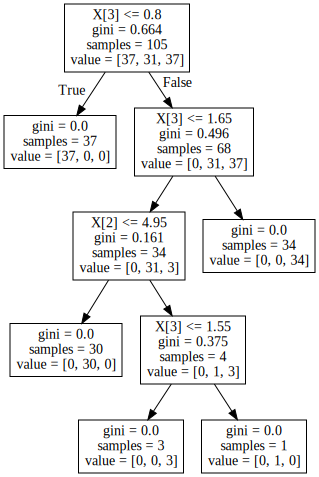

In [22]:
import graphviz
graphviz.Source(dot_graph)